# Airbnb Data Investigation - Seattle


In this project, I am going to analyze Seattle Airbnb data and answer some questions about Airbnb prices , availability, highly sought after locations etc., in Seattle. This analysis is done using the CRISP-DM process which stands for **Cross-Industry Standard Process for Data Mining**. Steps included in this process are - business understanding, data understanding, data preparation, modeling, evaluation, and deployment. Below are the three key questions I tried to answer through this analysis-

1. What are the most prominent features that help predicting Airbnb listing prices? 
2. What is the distribution of Airbnb prices in Seattle?
3. What are the most expensive areas to rent in Seattle?

These datasets from the firstlook are comprehensive and many kind of questions can be analyzed and answered using this data. But I am going to answer above three questions as a part of this project


## Importing datasets and First hand assessment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading input files
calendar_raw = pd.read_csv('calendar.csv')
listings_raw = pd.read_csv('listings.csv')
reviews_raw = pd.read_csv('reviews.csv')

In [3]:
listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [147]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [148]:
listings_raw['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill', 'Lake City'], dtype=object)

In [149]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
missingdata_cols = pd.DataFrame(listings_raw.isnull().sum (),columns=['n_missingval'])

n_records = len(listings_raw)
missingdata_cols['missing_proportion'] = missingdata_cols['n_missingval']*100/n_records

cols_withmissingdata = missingdata_cols[missingdata_cols['missing_proportion']>0]
print("There are {} columns with missing values.".format(len(cols_withmissingdata)))

There are 45 columns with missing values.


In [150]:
cols_withmissingdata[cols_withmissingdata['missing_proportion']>=20]

,n_missingval,missing_proportion
neighborhood_overview,1032,27.029859
notes,1606,42.063908
transit,934,24.463070
host_about,859,22.498690
host_acceptance_rate,773,20.246202
square_feet,3721,97.459403
weekly_price,1809,47.380828
monthly_price,2301,60.267156
security_deposit,1952,51.126244
cleaning_fee,1030,26.977475


In [151]:
reviews_raw.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [152]:
reviews_raw.shape

(84849, 6)

In [153]:
reviews_raw.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         17
dtype: int64

In [154]:
calendar_raw.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [155]:
calendar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [20]:
calendar_raw.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

## Initial Data Assessment

After looking at the three datasets, I will go ahead with only listings file as that dataset is sufficient for answering my questions. We can analyse review responses from review file using NLP and merge it to listing dataset but it would be too complex. Calendar data does not have any highly relevant information for my questions

### After looking at the summary of listing file, below are the steps I think we should do for data cleaning

**Columns to be dropped:** 'host_listings_count','calendar_last_scraped','calendar_updated','country','zipcode','country_code','experiences_offered','first_review','has_availability','host_id','host_location','host_name','host_neighbourhood','host_picture_url','host_thumbnail_url','host_url','id','jurisdiction_names','last_review','last_scraped','license','listing_url','medium_url','monthly_price','neighbourhood','picture_url','scrape_id','square_feet','thumbnail_url','weekly_price','xl_picture_url','name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit','street','city','state','host_about','host_acceptance_rate','security_deposit','cleaning_fee','license',
'market','smart_location','latitude','longitude','neighbourhood_cleansed'

I have decided to drop above columns as some of them are irrelevant and some of them are already explained by other variables and some have more than 20% missing values. We can impute missing values more than 20% in a column as the analysis/model would be distorted. Some of them contain text descriptions and urls which we are not analysing as of now
Latitude and longitude have also been deleted as we are dealing with one city's data. Average latitude and longitude values are same throughout the city which makes this variable redundant

**Cleaning Steps:**
1. Drop above columns
2. Check for missing values in rows
3. Do the missing value treatment for rows and columns
4. Price variables to be converted to float format and make changes accordingly for percentages and other variables which we want to be treated as numbers instead of objects and vice versa
5. Transform Boolean variables and encode Categorical variables wherever required

## Data Cleaning and Encoding

**Missing data handling by rows and columns**

In [156]:
#Dropping irrelevant columns
drop_cols =['host_listings_count','calendar_last_scraped','calendar_updated','country','zipcode','country_code','experiences_offered','first_review','has_availability','host_id','host_location','host_name','host_neighbourhood','host_picture_url','host_thumbnail_url','host_url','id','jurisdiction_names','last_review','last_scraped','license','listing_url','medium_url','monthly_price','neighbourhood','picture_url','scrape_id','square_feet','thumbnail_url','weekly_price','xl_picture_url','name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit','street','city','state','host_about','host_acceptance_rate','security_deposit','cleaning_fee','license','market','smart_location','latitude','longitude','neighbourhood_cleansed']
listings_cleaned = listings_raw.drop(drop_cols, axis=1)

In [157]:
listings_cleaned.shape

(3818, 42)

After removing irrelevant columns, we are left with 48 columns for further analysis

In [158]:
#No.of rows with missing data
print(sum(listings_cleaned.isnull().any(axis=1)))

984


Roughly 26% of the records in the dataset have atleast one missing value

In [159]:
# How much data is missing in each row of the dataset?
missing_rows = pd.DataFrame (listings_cleaned.isnull().sum (axis = 1), columns = ['missing_in_rows'])
print(len(missing_rows))
missing_rows.head()

3818


,missing_in_rows
0,0
1,0
2,0
3,10
4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228477FB5C0>]], dtype=object)

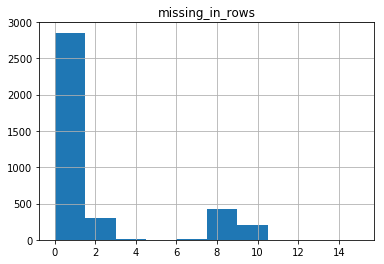

In [160]:
missing_rows.hist()

From above distribution, it looks like our data set can be split into two subsets. One with missing rows less than or equal to 8 and the other with missing rows greater than 8

In [161]:
listings_cleaned = listings_cleaned.join (missing_rows)
listings_cleaned.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_in_rows
0,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,2,$5.00,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07,0
1,2013-02-21,within an hour,98%,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,1,$0.00,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,t,t,6,1.48,0
2,2014-06-12,within a few hours,67%,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,10,$25.00,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,2,1.15,0
3,2013-11-06,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,1,$0.00,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN,10
4,2011-11-29,within an hour,100%,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,6,$15.00,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f,1,0.89,0


In [162]:
listings_cleaned_low = listings_cleaned[listings_cleaned['missing_in_rows']<=8]
listings_cleaned_high = listings_cleaned[listings_cleaned['missing_in_rows']>8]
print(len(listings_cleaned_low),len(listings_cleaned_high))

3604 214


Out of 3818 records, 214 records have more than 8 missing values which contribute to ~6% of the data. This is safe to remove as the no.of rows with missing values greater than 8 are low.

In [163]:
listings_cleaned1 = listings_cleaned_low.drop('missing_in_rows',axis=1)

**Data type transformation and feature encoding**

In [164]:
pd.set_option('display.max_columns', 100)
listings_cleaned1.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,2,$5.00,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,2013-02-21,within an hour,98%,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,1,$0.00,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,2014-06-12,within a few hours,67%,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,10,$25.00,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
4,2011-11-29,within an hour,100%,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,6,$15.00,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f,1,0.89
5,2010-12-25,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",$120.00,1,$30.00,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,1,2.45


In [165]:
listings_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 0 to 3817
Data columns (total 42 columns):
host_since                          3604 non-null object
host_response_time                  3292 non-null object
host_response_rate                  3292 non-null object
host_is_superhost                   3604 non-null object
host_total_listings_count           3604 non-null float64
host_verifications                  3604 non-null object
host_has_profile_pic                3604 non-null object
host_identity_verified              3604 non-null object
neighbourhood_group_cleansed        3604 non-null object
is_location_exact                   3604 non-null object
property_type                       3604 non-null object
room_type                           3604 non-null object
accommodates                        3604 non-null int64
bathrooms                           3592 non-null float64
bedrooms                            3598 non-null float64
beds                                

In [166]:
#Clean Price columns
price_cols = ['price','extra_people']
for col in price_cols:
    listings_cleaned1[col] = listings_cleaned1[col].str[1:].str.replace(',','').astype(float)

In [167]:
#Clean Percentage columns
listings_cleaned1['host_response_rate'] = listings_cleaned1['host_response_rate'].str[:-1].astype(float)/100

In [168]:
#Fixing Boolean columns
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
               'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
               'require_guest_phone_verification']
for col in bool_cols:
    listings_cleaned1[col].replace({'t':1, 'f':0}, inplace=True)

In [169]:
listings_cleaned1.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2011-08-11,within a few hours,0.96,0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,moderate,0,0,2,4.07
1,2013-02-21,within an hour,0.98,1,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,1,1,6,1.48
2,2014-06-12,within a few hours,0.67,0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,Queen Anne,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,0,0,2,1.15
4,2011-11-29,within an hour,1.00,0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,Queen Anne,1,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,strict,0,0,1,0.89
5,2010-12-25,NaN,NaN,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,Queen Anne,1,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,1,30.0,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,0,0,1,2.45


In [170]:
#Check for columns with null values
listings_cleaned1.isnull().sum()[listings_cleaned1.isnull().sum()>0]

host_response_time             312
host_response_rate             312
bathrooms                       12
bedrooms                         6
review_scores_rating           433
review_scores_accuracy         444
review_scores_cleanliness      439
review_scores_checkin          444
review_scores_communication    437
review_scores_location         441
review_scores_value            442
reviews_per_month              421
dtype: int64

There are 13 columns out of 45 which still have missing values. 
1. We cannot have NaN or 0 in bathrooms and bedrooms so lets delete the rows as they are very low in number
2. For all review related columns, we can replace NaN with 0 which basically means they did not give any reviews
3. For host response time, lets replace with mode as it is an object variable and for host response rate, lets consider average of the entire column

In [171]:
#Deleting rows with missing values in below columns
listings_cleaned1.dropna(subset=['bedrooms', 'bathrooms'], inplace=True)

In [172]:
#Replacing missing values with 0
cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
for col in cols:
    listings_cleaned1[col].fillna(0, inplace=True)

In [173]:
#Replacing missing values with mean and mode
listings_cleaned1['host_response_time'].fillna(listings_cleaned1['host_response_time'].mode()[0], inplace=True)
listings_cleaned1['host_response_rate'].fillna(listings_cleaned1['host_response_rate'].mean(), inplace=True)

In [174]:
#Check if there are anymore null values
listings_cleaned1.isnull().sum()[listings_cleaned1.isnull().sum()>0]

Series([], dtype: int64)

All missing values have been treated in the table. Now lets encode the categorical variables

In [78]:
listings_cleaned1.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2011-08-11,within a few hours,0.960000,0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,moderate,0,0,2,4.07
1,2013-02-21,within an hour,0.980000,1,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1,1,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,1,1,6,1.48
2,2014-06-12,within a few hours,0.670000,0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,Queen Anne,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,0,0,2,1.15
4,2011-11-29,within an hour,1.000000,0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,Queen Anne,1,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,strict,0,0,1,0.89
5,2010-12-25,within an hour,0.949013,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,Queen Anne,1,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,1,30.0,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,0,0,1,2.45


Out of all the categorical variables, host_verifications and amenities require multi level encoding as they include multiple levels with separators. Below is the split of those variables

In [175]:
listings_cleaned1.host_response_time.unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

This is an ordinal variable lets encode this as numbers with lowest response time having the highest number

In [176]:
#Encode responde time variable
listings_cleaned1.host_response_time.replace({'within an hour': 4,'within a few hours': 3,'within a day': 2,'a few days or more': 1}, inplace=True)

In [177]:
#Identify and define variable that are categorical and multi level as we have to encode them separately
multi_categ = ['host_verifications', 'amenities']
categ = ['neighbourhood_group_cleansed','property_type', 'room_type', 'bed_type',  'cancellation_policy']

In [178]:
#Categorical single encoding
listings_cleaned2 = pd.get_dummies(listings_cleaned1, columns=categ)
listings_cleaned2.shape

(3586, 81)

In [179]:
#remove quotes and other brackets, get the list and encode values
host_verifications_encoded = listings_cleaned1.host_verifications.apply(eval).str.join('|').str.get_dummies()
amenities_encoded = listings_cleaned1.amenities.str.strip('{}').str.replace('"','').str.split(',').str.join('|').str.get_dummies()

In [181]:
#Check
host_verifications_encoded.head()

,amex,email,facebook,google,jumio,kba,linkedin,manual_offline,manual_online,phone,photographer,reviews,sent_id,weibo
0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,0,1,1,0,1,0,1,0,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,0,1,0,1,0,0
4,0,1,1,0,0,1,0,0,0,1,0,1,0,0
5,0,1,1,0,0,1,0,0,0,1,0,1,0,0


In [182]:
#Check
amenities_encoded.head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [183]:
#Combine the encoded datasets to the main dataframe
listings_cleaned2 = pd.concat([listings_cleaned2, host_verifications_encoded], axis=1)
listings_cleaned2 = pd.concat([listings_cleaned2, amenities_encoded], axis=1)

In [184]:
listings_cleaned2.shape

(3586, 136)

In [185]:
#Drop Original columns from the dataset
listings_cleaned2.drop(multi_categ, axis=1, inplace=True)

In [186]:
#Lets convert host_since to no.of years the user has been on Airbnb
listings_cleaned2.host_since = pd.to_datetime(listings_cleaned2.host_since).apply(lambda x: 2019 - x.year)

In [187]:
listings_cleaned2.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,...,kba,linkedin,manual_offline,manual_online,phone,photographer,reviews,sent_id,weibo,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,8,3,0.960000,0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,0,2,4.07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,6,4,0.980000,1,6.0,1,1,1,4,1.0,1.0,1.0,150.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,6,1.48,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,5,3,0.670000,0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,2,1.15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
4,8,4,1.000000,0,2.0,1,1,1,6,2.0,3.0,3.0,450.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,0,0,1,0.89,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
5,9,4,0.949013,0,1.0,1,1,1,2,1.0,1.0,1.0,120.0,1,30.0,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,2.45,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


Now that we are done with EDA and data cleaning steps, our data is ready for statistical modeling

## Statistical Modeling

As we are looking to predict price based on all other variables, we should use regression models and not classification models as we are not looking at a binary dependent variable. I am using Decision Tree regressor for predicting the price of Airbnb accomoodations.

I am not doing any normalization or feature scaling as Decision tree Regressor model does not require any feature scaling. However, if we choose to run any other model, we need to scale the data accordingly as per the requirements

In [188]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [189]:
#Split our data into Training at test sets with test sample size of 20%
X = listings_cleaned2.drop(['price'], axis=1)
y = listings_cleaned2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
#Initialize the model
model = DecisionTreeRegressor(max_depth=8, min_samples_split=16, min_samples_leaf=8,random_state=42)

In [191]:
#Fit the data
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [192]:
print('The training score is {0:0.1f}'.format(model.score(X_train, y_train)))
print('The test score is {0:0.1f}'.format(model.score(X_test, y_test)))

The training score is 0.7
The test score is 0.5


Our model does fairly well on the training dataset with a score of 0.7 but on the test data set, it's prediction score is 0.5 which is not great but not bad as well

### Question 1 : What are the most prominent features that are key for predicting listing price?

In [193]:
feature_weights = pd.concat((pd.Series(X.columns), pd.Series(model.feature_importances_)), axis=1)
feature_weights.columns = ['Features', 'Weights']
feature_weights.sort_values(by='Weights', ascending=False).head(20)

,Features,Weights
10,bedrooms,0.553990
9,bathrooms,0.169491
67,room_type_Entire home/apt,0.066337
33,reviews_per_month,0.026674
108,Gym,0.013531
12,guests_included,0.012878
0,host_since,0.012515
40,neighbourhood_group_cleansed_Downtown,0.011428
112,Hot Tub,0.011368
18,availability_90,0.009931


In [194]:
top_features = feature_weights.sort_values(by='Weights', ascending=False).head(12)

Text(0.5,1,'Seattle Airbnb Feature Weights')

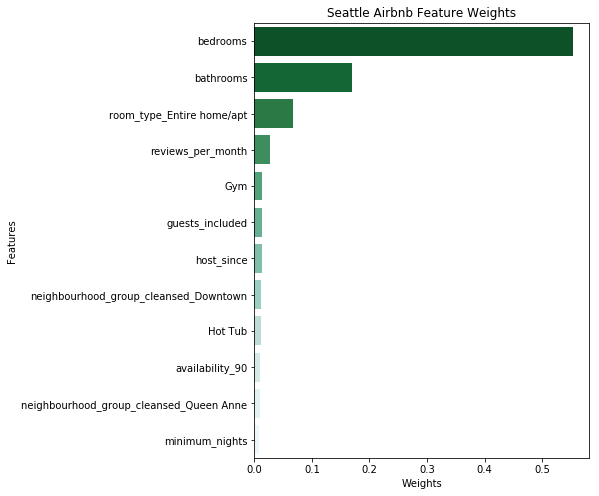

In [195]:
plt.figure(figsize=(6, 8))
ax = sns.barplot(x='Weights',y='Features',data=top_features,palette='BuGn_r')
ax.set_title('Seattle Airbnb Feature Weights')

Looking at the top features in Seattle above, the top 6 categories for renting a home through Airbnb in Seattle are - 

1. No.of Bedrooms
3. No.of bathrooms in the property
3. Entire Apt/home available for rent
4. No.of reviews per month for the listing
5. If the property has a Gym
6. No.of people accommodated

Other top features relate to amenities like Elevator, Carbon Monoxide/Smoke detectors, First aid Kits, hot tub, no.of days of availability etc., People are also looking whether the listing environment is Family/Kid friendly, no.of guest allowed as well. Most popular neghborhoods are Seattle Downtown, Queen Anne and Capitol Hill

### Question 2 : What is the distribution of Airbnb prices in Seattle?

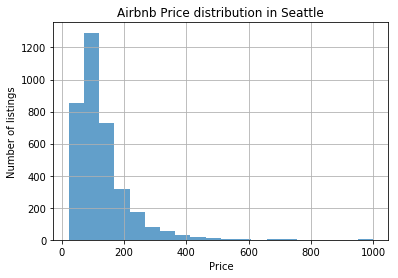

In [196]:
listings_cleaned2.price.hist(bins=20, alpha=0.7);                                                                                            
plt.title("Airbnb Price distribution in Seattle");   
plt.xlabel('Price');
plt.ylabel('Number of listings');

From above price distribution, it is evident that majority of the listings have price less than 400$. Lets see it in further detail

In [197]:
listings_cleaned2.price.max(),listings_cleaned2.price.min(),listings_cleaned2.price.mean()

(1000.0, 22.0, 127.37534857780257)

In [198]:
len(listings_cleaned2[(listings_cleaned2['price'] <= 400)])/len(listings_cleaned2)

0.9832682654768544

Astonishingly 98% of the listings in our cleaned data have a price less than or equal to USD 400.However there are some outliers where the price ranges upto **USD 1000**. The most expensive listing in Seattle amounts to **USD 1000**
The mean listing price in Seattle is **USD 127** for Airbnb properties

### Question 3 : What are the most expensive areas to rent in Seattle?

In [199]:
listings_cleaned1.neighbourhood_group_cleansed.nunique()

17

In [200]:
neighbourhood_avgprice = listings_cleaned1.groupby('neighbourhood_group_cleansed',as_index=False)['price'].mean().sort_values(by='price', ascending=False).head(10)


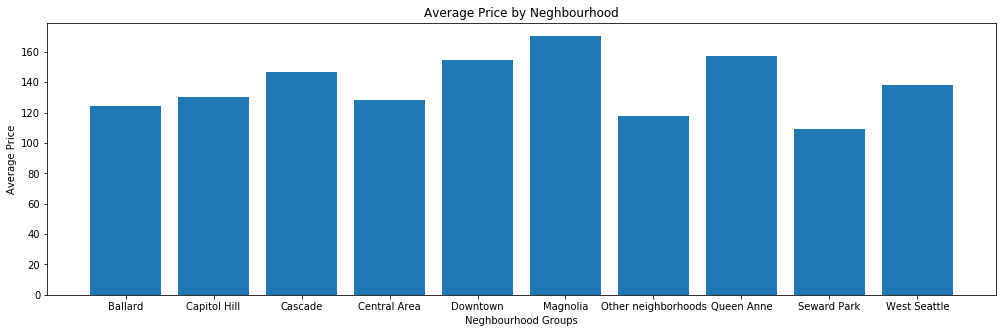

In [201]:
plt.figure(figsize=(17, 5))
plt.bar(neighbourhood_avgprice.neighbourhood_group_cleansed, neighbourhood_avgprice.price)
plt.title('Average Price by Neghbourhood')
plt.xlabel('Neghbourhood Groups')
plt.ylabel('Average Price')
plt.legend()

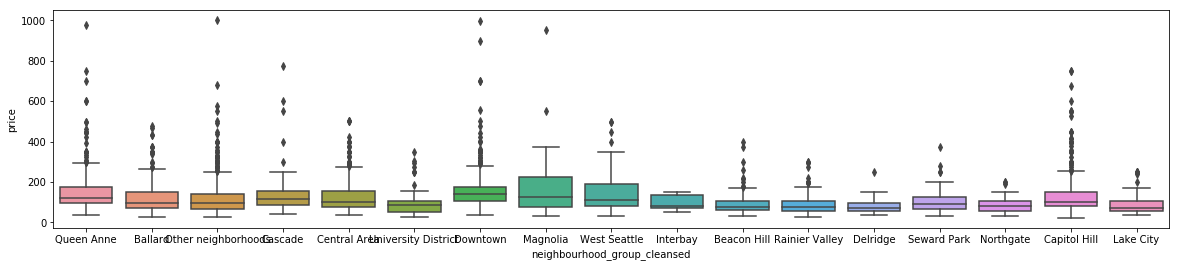

In [202]:
plt.figure(figsize=(20, 4))
sns.boxplot(listings_cleaned1.neighbourhood_group_cleansed, listings_cleaned1.price);

There is data available for 17 neighbourhood groups in Seattle in Airbnb listing data. Notable observations are - 

1. Magnoalia and West Seattle have the highest spread in prices where as Capitol hill, Downtown, Queen Anne have quite a few outliers which might imply that these neighbourhoods have the most no.of expensive properties for rent in Seattle

2. If we look at average prices by neighbourhood, Magnolia, Queen Anne, Downtown and Capitol Hill have the highest average prices which is confirmed by the box plot as price range for these neighbourhoods are relatively higher. Central Seattle, Ballard and Seward park have lowest average prices

To support this further, our Decision tree Regressor model also suggests that Queen Anne, Downtown and Capitol Hill neighbourhoods are one of the most prominent factors for predicting listing prices in Seattle

## Conclusion

Top 6 categories for renting a home through Airbnb in Seattle are - 

1. No.of Bedrooms
3. No.of bathrooms in the property
3. Entire Apt/home available for rent
4. No.of reviews per month for the listing
5. If the property has a Gym
6. No.of people accommodated

Other top features relate to amenities like Elevator, Carbon Monoxide/Smoke detectors, First aid Kits, hot tub, no.of days of availability etc., People are also looking whether the listing environment is Family/Kid friendly, no.of guest allowed as well. Most popular neghborhoods are Seattle Downtown, Queen Anne and Capitol Hill


Out of 17 neighbourhood groups in Seattle in Airbnb listing data, Notable observations are - 
1. Magnoalia and West Seattle have the highest spread in prices where as Capitol hill, Downtown, Queen Anne have quite a few outliers which might imply that these neighbourhoods have the most no.of expensive properties for rent in Seattle

2. If we look at average prices by neighbourhood, Magnolia, Queen Anne, Downtown and Capitol Hill have the highest average prices which is confirmed by the box plot as price range for these neighbourhoods are relatively higher. Central Seattle, Ballard and Seward park have lowest average prices

To support this further, our Decision tree Regressor model also suggests that Queen Anne, Downtown and Capitol Hill neighbourhoods are one of the most prominent factors for predicting listing prices in Seattle


Astonishingly 98% of the listings in our cleaned data have a price less than or equal to USD 400.However there are some outliers where the price ranges upto **USD 1000**. The most expensive listing in Seattle amounts to **USD 1000**
The mean listing price in Seattle is **USD 127** for Airbnb properties